In [204]:
import pandas as pd

In [205]:
data = pd.read_csv('Assignment Data Analyst MSIB Batch 7.csv')

In [206]:
data.head()

,ga:sourceMedium,ga:pageTitle,ga:users,ga:bounceRate,ga:pageviews,ga:pageviewsPerSession,ga:avgTimeOnPage
0,facebook / cpc,"Bikin Lambe Turah Diomelin, Nih Si Seksi yang ...",13736.0,19.269967,83593.0,6.042140,21.790189
1,facebook / cpc,Heboh! Kiki Farel Transfer Uang Jajan Rp 1 Jut...,15909.0,62.303763,74032.0,4.612011,16.330553
2,facebook / cpc,"Tak Sesuai Harapan, Barang Belanja Online Ini ...",7748.0,30.934520,54657.0,6.949396,21.429338
3,facebook / cpc,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",43893.0,6.966219,47924.0,1.106560,5.056397
4,facebook / cpc,Melihat Kantor Pelayanan Grab Driver Center,41155.0,11.630219,44072.0,43.809145,180.944233


In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ga:sourceMedium         156 non-null    object 
 1   ga:pageTitle            156 non-null    object 
 2   ga:users                155 non-null    float64
 3   ga:bounceRate           155 non-null    float64
 4   ga:pageviews            155 non-null    float64
 5   ga:pageviewsPerSession  155 non-null    float64
 6   ga:avgTimeOnPage        155 non-null    float64
dtypes: float64(5), object(2)
memory usage: 8.7+ KB


Dataset berisikan kolom-kolom dengan informasi sumber dan medium lalu lintas, judul halaman,jumlah pengguna, bounce rate, jumlah tampilan halaman, avg tampilan per sesi, avg waktu yang dihabiskan di halaman tersebut

In [208]:
data.isnull().sum()

ga:sourceMedium           0
ga:pageTitle              0
ga:users                  1
ga:bounceRate             1
ga:pageviews              1
ga:pageviewsPerSession    1
ga:avgTimeOnPage          1
dtype: int64

terdapat data yang kosong pada kolom ga:users, ga:bounceRate, ga:pageviews ga:pageviewsPerSession, ga:avgTimeOnPage

In [209]:
data.describe()

,ga:users,ga:bounceRate,ga:pageviews,ga:pageviewsPerSession,ga:avgTimeOnPage
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1995.722581,31.925982,3607.174194,16.204284,75.428357
std,6449.314679,36.030184,11845.050364,32.522916,77.975259
min,9.000000,0.000000,215.000000,0.000000,2.814915
25%,108.000000,0.000000,287.000000,0.000000,16.948403
50%,233.000000,17.070773,431.000000,2.353535,44.720930
75%,458.000000,62.401881,826.000000,22.194444,109.392803
max,43893.000000,100.000000,83593.000000,268.833333,449.897196


## Pembersihan data

In [210]:
import numpy as np

In [211]:
data.replace(0, np.nan, inplace= True)

In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ga:sourceMedium         156 non-null    object 
 1   ga:pageTitle            156 non-null    object 
 2   ga:users                155 non-null    float64
 3   ga:bounceRate           86 non-null     float64
 4   ga:pageviews            155 non-null    float64
 5   ga:pageviewsPerSession  108 non-null    float64
 6   ga:avgTimeOnPage        155 non-null    float64
dtypes: float64(5), object(2)
memory usage: 8.7+ KB


In [213]:
data['ga:users'].fillna(data['ga:users'].mean(), inplace=True)
data['ga:bounceRate'].fillna(data['ga:bounceRate'].mean(), inplace=True)
data['ga:pageviews'].fillna(data['ga:pageviews'].mean(), inplace=True)
data['ga:avgTimeOnPage'].fillna(data['ga:avgTimeOnPage'].mean(), inplace=True)
data['ga:pageviewsPerSession'].fillna(data['ga:pageviewsPerSession'].mean(), inplace=True)

data yang kosong diganti dengan nilai mean

In [214]:
data.isnull().sum()

ga:sourceMedium           0
ga:pageTitle              0
ga:users                  0
ga:bounceRate             0
ga:pageviews              0
ga:pageviewsPerSession    0
ga:avgTimeOnPage          0
dtype: int64

In [215]:
data[data.duplicated(keep=False)]

,ga:sourceMedium,ga:pageTitle,ga:users,ga:bounceRate,ga:pageviews,ga:pageviewsPerSession,ga:avgTimeOnPage


In [216]:
import matplotlib.pyplot as plt
import seaborn as sns

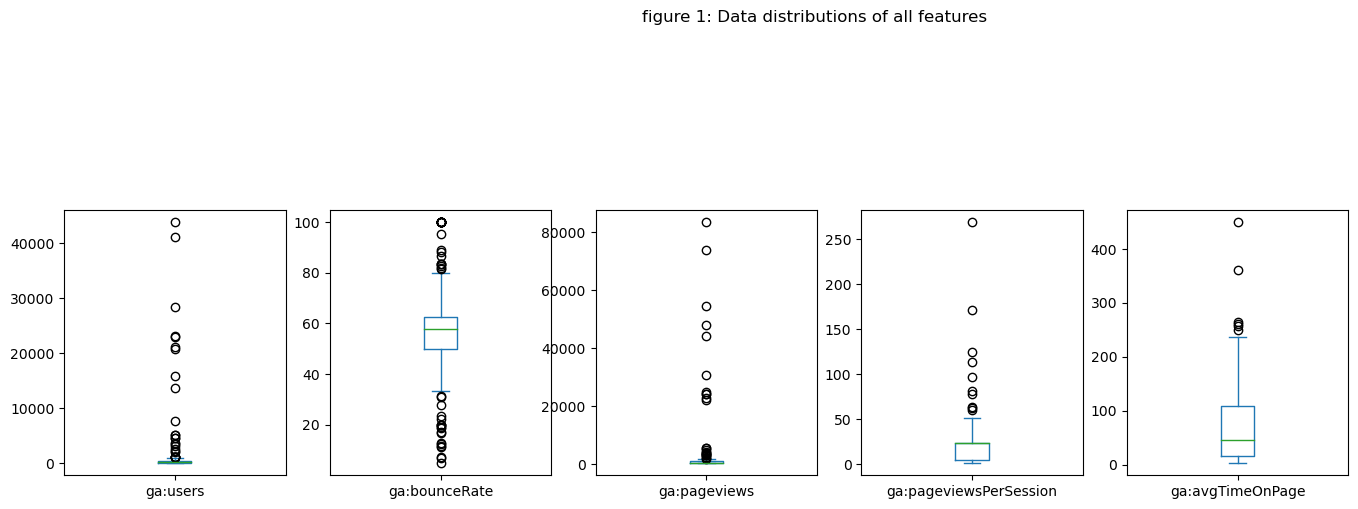

In [217]:
ax = data.plot(
    kind='box',
    subplots=True,
    layout=(5, 6),
    sharex=False,
    figsize=(20, 20),
    title='figure 1: Data distributions of all features'
)

plt.show()

In [218]:
data = data.drop(columns=['ga:sourceMedium', 'ga:pageTitle'])

In [219]:
data.head()

,ga:users,ga:bounceRate,ga:pageviews,ga:pageviewsPerSession,ga:avgTimeOnPage
0,13736.0,19.269967,83593.0,6.042140,21.790189
1,15909.0,62.303763,74032.0,4.612011,16.330553
2,7748.0,30.934520,54657.0,6.949396,21.429338
3,43893.0,6.966219,47924.0,1.106560,5.056397
4,41155.0,11.630219,44072.0,43.809145,180.944233


penghapusan kolom sourceMedium dan pageTitle karena tidak digunakan

## Analisis

In [220]:
descriptive = data.describe()
descriptive

,ga:users,ga:bounceRate,ga:pageviews,ga:pageviewsPerSession,ga:avgTimeOnPage
count,156.000000,156.000000,156.000000,156.000000,156.000000
mean,1995.722581,57.541014,3607.174194,23.256148,75.428357
std,6428.476774,21.725878,11806.778695,30.604665,77.723318
min,9.000000,4.812834,215.000000,1.044180,2.814915
25%,108.000000,50.000000,287.000000,4.562183,17.047163
50%,233.000000,57.541014,431.000000,23.256148,45.800941
75%,460.250000,62.352822,846.250000,23.256148,109.165675
max,43893.000000,100.000000,83593.000000,268.833333,449.897196


semua kolom sudah memiliki 156 data yang valid


## visualisasi

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

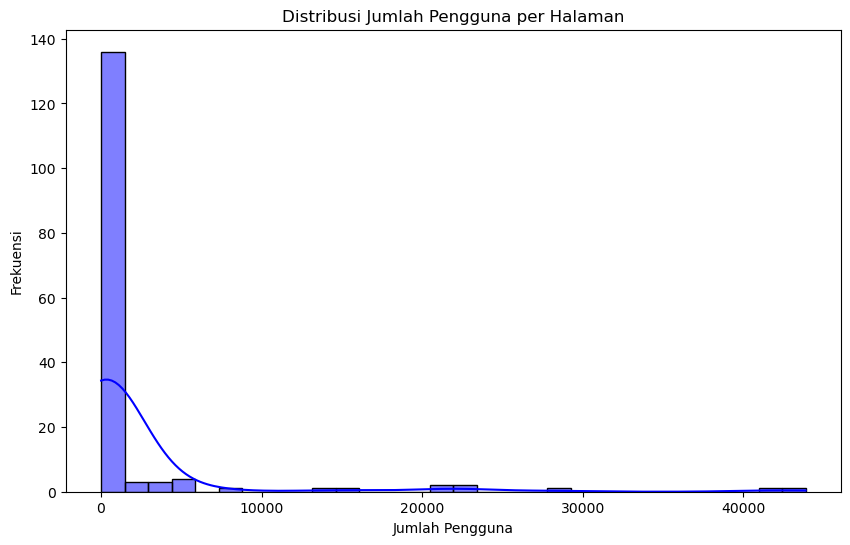

In [222]:
# Visualisasi distribusi jumlah pengguna
plt.figure(figsize=(10, 6))
sns.histplot(data['ga:users'], bins=30, kde=True, color='blue')
plt.title('Distribusi Jumlah Pengguna per Halaman')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Frekuensi')
plt.show()


### hubungan bouce rate dan jumlah pengguna

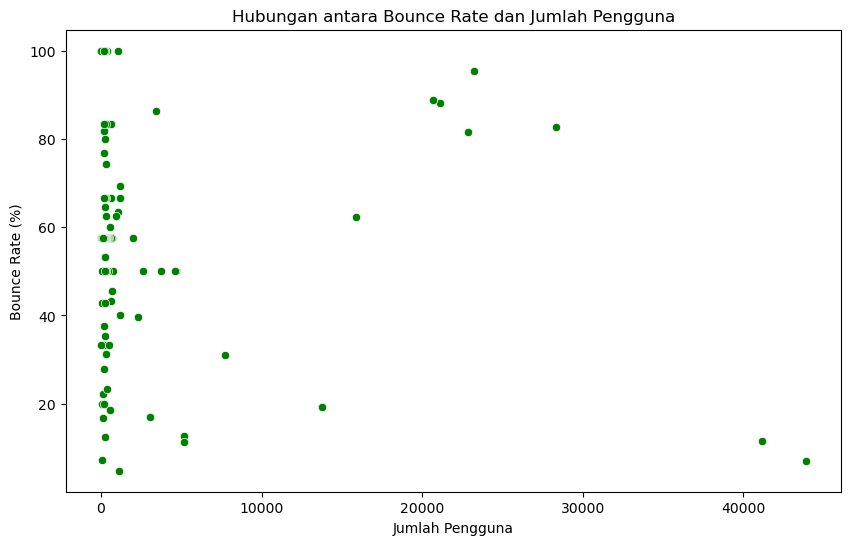

In [223]:
# Visualisasi hubungan antara bounce rate dan jumlah pengguna
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['ga:users'], y=data['ga:bounceRate'], color='green')
plt.title('Hubungan antara Bounce Rate dan Jumlah Pengguna')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Bounce Rate (%)')
plt.show()


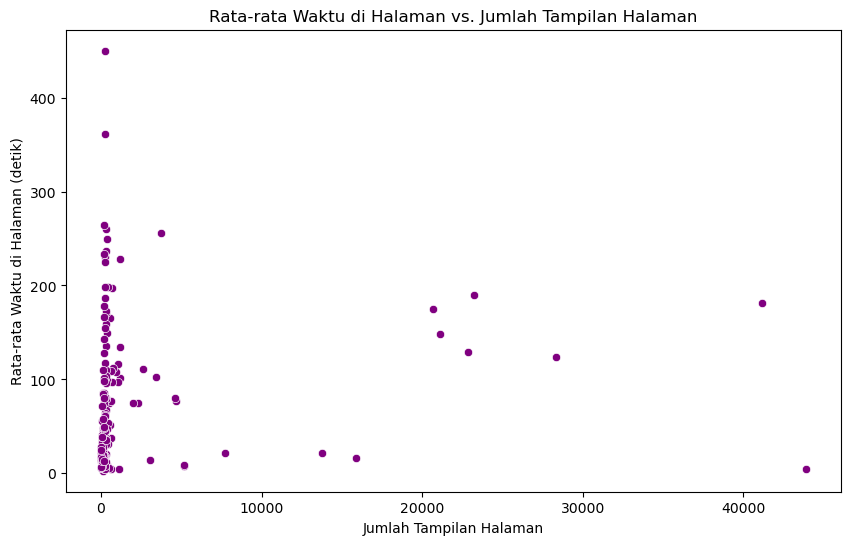

In [224]:
# Visualisasi rata-rata waktu di halaman vs. jumlah tampilan halaman
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['ga:users'], y=data['ga:avgTimeOnPage'], color='purple')
plt.title('Rata-rata Waktu di Halaman vs. Jumlah Tampilan Halaman')
plt.xlabel('Jumlah Tampilan Halaman')
plt.ylabel('Rata-rata Waktu di Halaman (detik)')
plt.show()


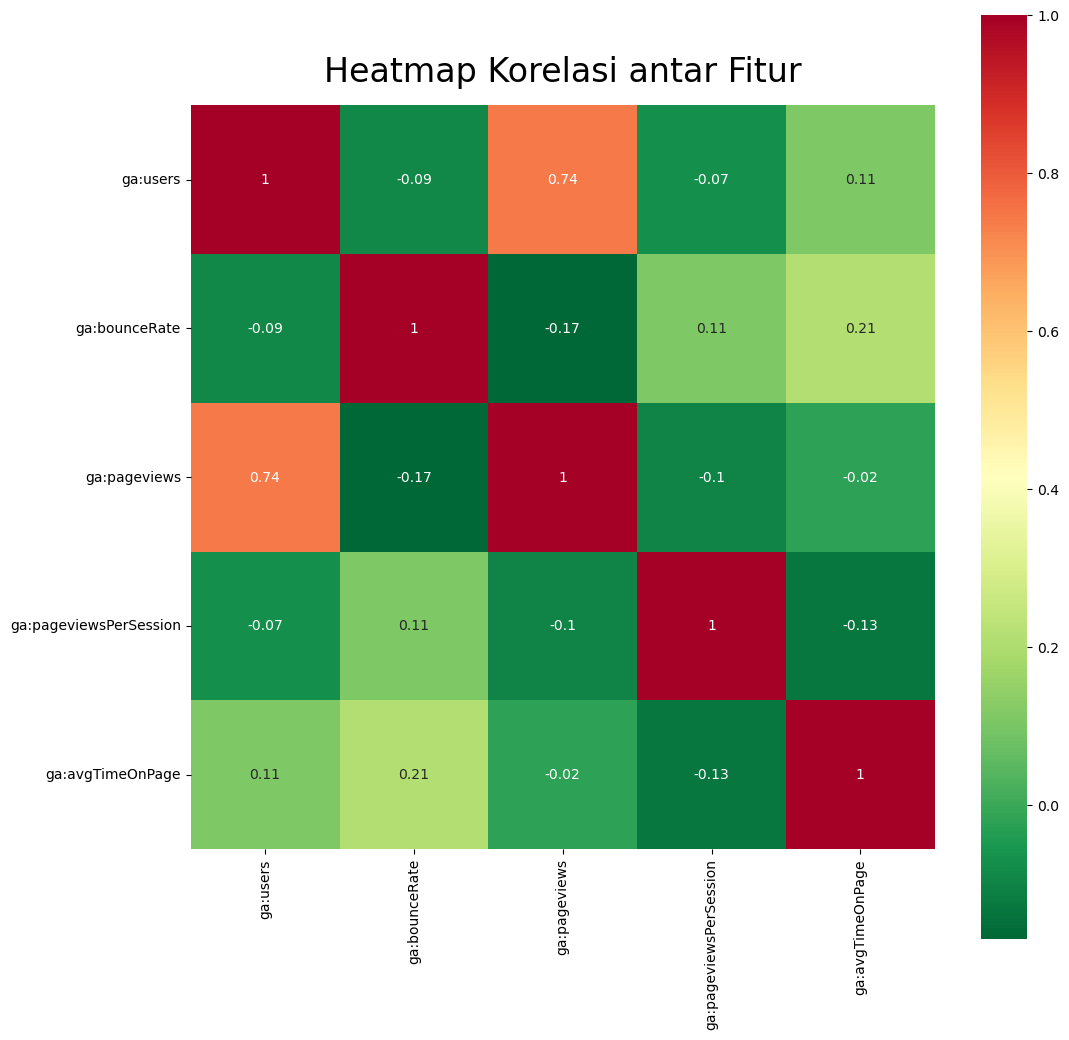

In [225]:
# Menampilkan Korelasi antar Fitur
correlation = data.corr()
plt.figure(figsize=(12, 12))
plt.title("Heatmap Korelasi antar Fitur", y=1.02, fontdict={'size': 24})
sns.heatmap(
    correlation.round(2),
    annot = True,
    vmax = 1,
    square = True,
    cmap = 'RdYlGn_r'
)

plt.show()

dilihat dari headmap kolom ga:pageview memiliki korela tinggi terhadap ga:users yaitu 0.74 sedangkan yang kedua yaitu ga:bounceRate memiliki korelasi dengan ga:avgTimeOnPage sebesar 0.21

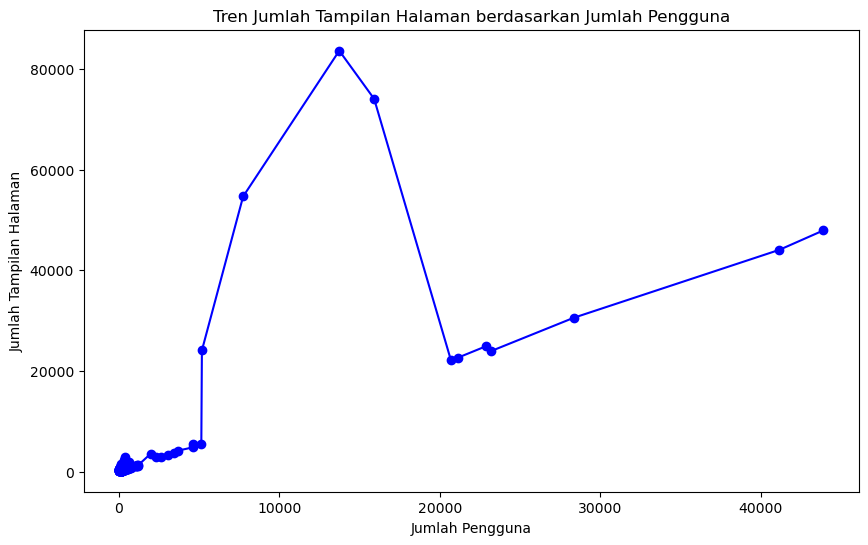

In [226]:
# Mengurutkan data berdasarkan ga:users untuk melihat tren
df_sorted = data.sort_values(by='ga:users')

# Visualisasi trend jumlah tampilan halaman berdasarkan jumlah pengguna
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['ga:users'], df_sorted['ga:pageviews'], marker='o', linestyle='-', color='blue')
plt.title('Tren Jumlah Tampilan Halaman berdasarkan Jumlah Pengguna')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Jumlah Tampilan Halaman')
plt.show()


meilihat pola/tren dalam distribusi data berdasarkan jumlah penggunanya

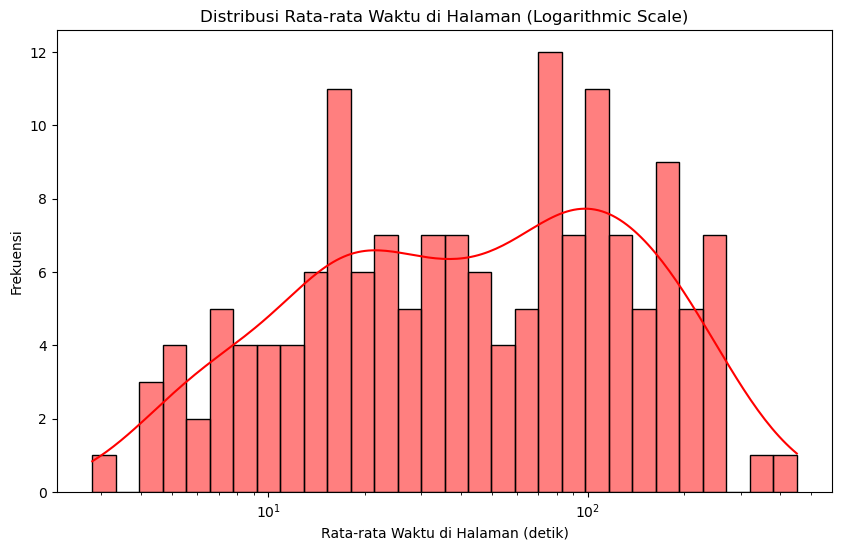

In [227]:
# Visualisasi histogram rata-rata waktu di halaman dengan skala logaritmik
plt.figure(figsize=(10, 6))
sns.histplot(data['ga:avgTimeOnPage'], bins=30, kde=True, color='red', log_scale=True)
plt.title('Distribusi Rata-rata Waktu di Halaman (Logarithmic Scale)')
plt.xlabel('Rata-rata Waktu di Halaman (detik)')
plt.ylabel('Frekuensi')
plt.show()


## hasil analisis

- bounce rate
    
    dapat dilakukan kelompok segmentasi seperti low bounce rate (0-25): pegguna mengunjungi halaman ini, medium bounce rate (25-50): pengguna mninggalkan situs tingkat sedang, high bounce rate (50-75): pengguna sering meninggalkan situs setelah melihat halaman ini, dan very high bounce rate (75-100): pengguna hampi selalu meninggalkan situs setelah meilhat halaman ini
- avg time on page

    dikelompokkan menjadi short time (0-30 detik): pengguna menghabiskan waktu singkat, medium time (30 detik-2 menit): pengguna menghabiskan waktu sedang, Long Time (2 menit - 5 menit): Pengguna menghabiskan waktu cukup lama. Very Long Time (lebih dari 5 menit): Pengguna menghabiskan waktu yang sangat lama.
    

In [228]:
# Segmen untuk Bounce Rate
def bounce_rate_segment(br):
    if br <= 25:
        return 'Low (0-25%)'
    elif br <= 50:
        return 'Medium (25-50%)'
    elif br <= 75:
        return 'High (50-75%)'
    else:
        return 'Very High (75-100%)'


In [229]:
# Segmen untuk average time
def time_on_page_segment(time):
    if time <= 30:
        return 'Short (0-30s)'
    elif time <= 120:
        return 'Medium (30s-2min)'
    elif time <= 300:
        return 'Long (2-5min)'
    else:
        return 'Very Long (>5min)'

In [230]:
data['bounceRateSegment'] = data['ga:bounceRate'].apply(bounce_rate_segment)
data['timeOnPageSegment'] = data['ga:avgTimeOnPage'].apply(time_on_page_segment)


In [231]:
segmentation = data.groupby(['bounceRateSegment', 'timeOnPageSegment']).size().unstack(fill_value=0)


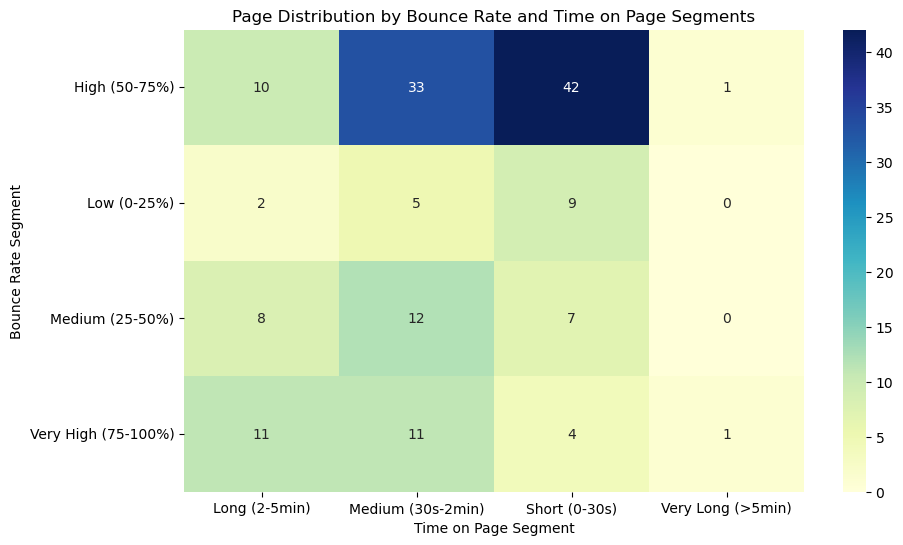

In [232]:
plt.figure(figsize=(10, 6))
sns.heatmap(segmentation, annot=True, cmap="YlGnBu", cbar=True, fmt="d")
plt.title('Page Distribution by Bounce Rate and Time on Page Segments')
plt.ylabel('Bounce Rate Segment')
plt.xlabel('Time on Page Segment')
plt.show()

Dengan menggabungkan bounce rate dan waktu di halaman, dapat lebih memahami kualitas interaksi pengguna dengan situs web. Halaman-halaman dengan kombinasi bounce rate rendah dan waktu yang tinggi merupakan aset berharga, sementara halaman dengan bounce rate tinggi dan waktu yang rendah memerlukan perhatian. Analisis ini akan membantu mengarahkan upaya optimasi dengan lebih efektif.